# 自我中心图（Ego图）

在NetworkX中创建`自我中心图（Ego图）`，并找出连接数最大的主节点，构建以主节点为中心的邻域子图。

同济子豪兄 2022-7-9

参考文档：https://networkx.org/documentation/stable/auto_examples/drawing/plot_ego_graph.html#sphx-glr-auto-examples-drawing-plot-ego-graph-py

## 导入工具包

In [1]:
# 图数据挖掘
import networkx as nx

import numpy as np

# 数据可视化
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
from operator import itemgetter

## 创建Barabási-Albert无标度网络

论文：A. L. Barabási and R. Albert "Emergence of scaling in random networks", Science 286, pp 509-512, 1999.

n个节点逐渐生长，新节点与degree高的旧节点产生m条连接。

In [3]:
n = 1000
m = 2
seed = 20532
G = nx.barabasi_albert_graph(n, m, seed=seed)

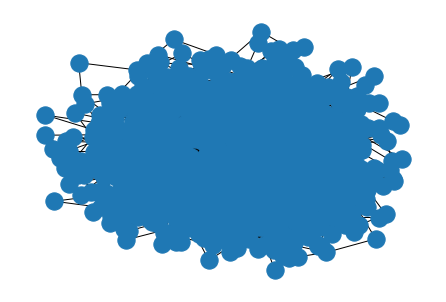

In [4]:
pos = nx.spring_layout(G, seed=seed)
nx.draw(G, pos)

## 找到degree最大的主节点

In [5]:
largest_hub, degree = sorted(G.degree(), key=itemgetter(1))[-1]

In [6]:
largest_hub

4

In [7]:
degree

88

## 找到以主节点为中心的邻域子图（Ego Graph）

In [8]:
nx.ego_graph?

Signature: nx.ego_graph(G, n, radius=1, center=True, undirected=False, distance=None)
Docstring:
Returns induced subgraph of neighbors centered at node n within
a given radius.

Parameters
----------
G : graph
  A NetworkX Graph or DiGraph

n : node
  A single node

radius : number, optional
  Include all neighbors of distance<=radius from n.

center : bool, optional
  If False, do not include center node in graph

undirected : bool, optional
  If True use both in- and out-neighbors of directed graphs.

distance : key, optional
  Use specified edge data key as distance.  For example, setting
  distance='weight' will use the edge weight to measure the
  distance from the node n.

Notes
-----
For directed graphs D this produces the "out" neighborhood
or successors.  If you want the neighborhood of predecessors
first reverse the graph with D.reverse().  If you want both
directions use the keyword argument undirected=True.

Node, edge, and graph attributes are copied to the returned subgra

In [23]:
hub_ego = nx.ego_graph(G, largest_hub, radius=1)

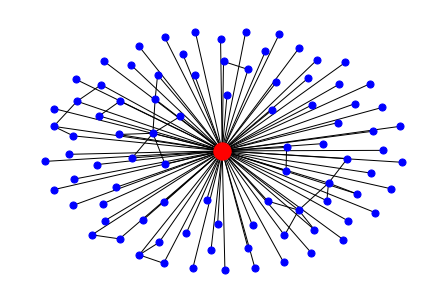

In [24]:
pos = nx.spring_layout(hub_ego, seed=seed)
nx.draw(hub_ego, pos, node_color="b", node_size=50, with_labels=False)

# 大红显示主节点
options = {"node_size": 300, "node_color": "r"}
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], **options)

plt.show()